# 10.2 数据预处理

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
print('train data: ', 'images: ', x_img_train.shape, ' labels:', y_label_train.shape)
print('test data: ', 'images: ', x_img_test.shape, ' labels: ', y_label_test.shape)

train data:  images:  (50000, 32, 32, 3)  labels: (50000, 1)
test data:  images:  (10000, 32, 32, 3)  labels:  (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

# 10.3 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))

In [9]:
model.add(Dropout(rate=0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(1024, activation='relu'))

In [17]:
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(10, activation='softmax'))

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 10.4 进行训练

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 98s 2ms/step - loss: 1.5039 - acc: 0.4583 - val_loss: 1.2784 - val_acc: 0.5801
Epoch 2/10
40000/40000 [==============================] - 97s 2ms/step - loss: 1.1362 - acc: 0.5979 - val_loss: 1.1059 - val_acc: 0.6432
Epoch 3/10
40000/40000 [==============================] - 96s 2ms/step - loss: 0.9804 - acc: 0.6555 - val_loss: 1.0015 - val_acc: 0.6680
Epoch 4/10
40000/40000 [==============================] - 97s 2ms/step - loss: 0.8731 - acc: 0.6930 - val_loss: 0.9527 - val_acc: 0.6954
Epoch 5/10
40000/40000 [==============================] - 97s 2ms/step - loss: 0.7856 - acc: 0.7250 - val_loss: 0.8825 - val_acc: 0.7071
Epoch 6/10
40000/40000 [==============================] - 97s 2ms/step - loss: 0.7011 - acc: 0.7530 - val_loss: 0.8530 - val_acc: 0.7124
Epoch 7/10
40000/40000 [==============================] - 96s 2ms/step - loss: 0.6214 - acc: 0.7799 - val_loss: 0.8200 - val_acc

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show

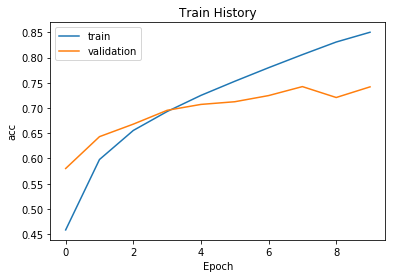

In [23]:
show_train_history(train_history, 'acc', 'val_acc')

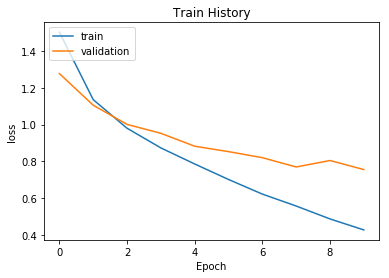

In [24]:
show_train_history(train_history, 'loss', 'val_loss')

# 10.5 评估模型准确率

In [25]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose = 0)
scores[1]

0.7349

# 10.6 进行预测

In [26]:
prediction = model.predict_classes(x_img_test_normalize)

In [27]:
prediction[0:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 9])

In [30]:
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 
              5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        title=str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' + label_dict[prediction[i]]
            
        ax.set_title(title, fontsize = 12, color = 'white')
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

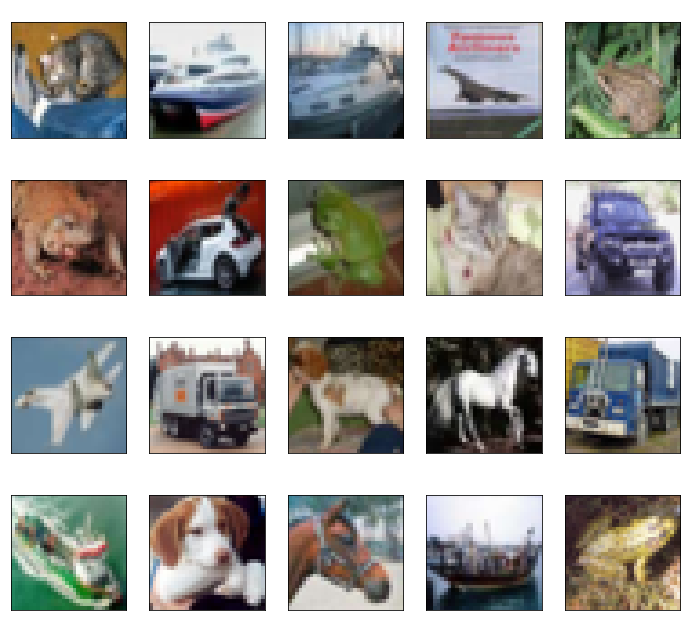

In [32]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 20)